# CES Datascientist

## Introduction au Python pour le Machine learning

Télécom ParisTech, équipe S2A

Ce notebook contient des éléments d'introduction au langage Python avec Numpy qui est un outil de base pour le machine learning en Python. Nous allons illustrer tous les concepts sur des images.

Ressources externes:

- http://scipy-lectures.github.io
- http://perso.telecom-paristech.fr/~gramfort/cours_python/1-Intro-Python.html
- http://perso.telecom-paristech.fr/~gramfort/cours_python/2-Numpy.html
- http://perso.telecom-paristech.fr/~gramfort/cours_python/3-Scipy.html
- http://www.loria.fr/~rougier/teaching/matplotlib/matplotlib.html
- https://github.com/agramfort/sklearn_pandas_intro
- http://jrjohansson.github.io/

## Imports et intialisation

In [1]:
%matplotlib inline                      

import numpy as np                      # charge un package pour le numérique
import matplotlib.pyplot as plt         # charge un package pour les graphiques

# 0 - Manipulation d'une image en Python avec Numpy

In [2]:
from scipy import ndimage
img = ndimage.imread('panda.jpg')

**Questions**:

- quel est le type de img? le dtype? le nombre de dimensions? la shape?

In [19]:
print(img.dtype)
print(img.size)
print(img.shape)

uint8
32336
(172, 188)


* Afficher `img` avec la fonction plt.imshow

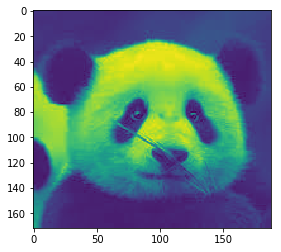

In [21]:
plt.imshow(img)

Affichage de l'histogramme des niveaux de gris:

In [16]:
img.reshape(img.size).shape

(32336,)

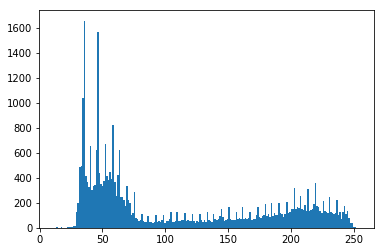

In [25]:
_ = plt.hist(img.reshape(img.size), 200)

Nous allons maintenant utiliser le fancy indexing de Python pour mettre l'image sur seulement 4 couleurs / niveaux de gris.

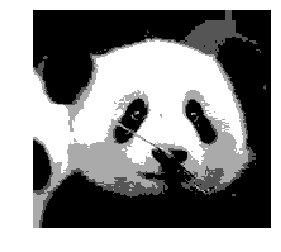

In [26]:
img[img < 70] = 50
img[(img >= 70) & (img < 110)] = 100
img[(img >= 110) & (img < 180)] = 150
img[(img >= 180)] = 200
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

**Question**: 
* Afficher l'histogramme de l'image modifiée

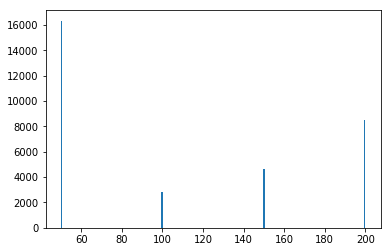

In [27]:
_ = plt.hist(img.reshape(img.size), 200)

#### Accéder aux couches RGB d'une image:

In [28]:
img = ndimage.imread('paresseux.jpg')

**Questions**:

- Quel est la shape de img? le dtype?
- Afficher les couches R, G et B de l'image en utilisant les colormaps plt.cm.Reds, plt.cm.Greens, plt.cm.Blues
- Afficher l'image entre les lignes 20 et 150 et les colonnes entre 100 et 300.
- Afficher l'image entre les lignes 20 et 150 et les colonnes entre 100 et 300 mais 1 pixel sur 3. 

In [30]:
img.shape

(152, 332, 3)

In [31]:
img.dtype

dtype('uint8')

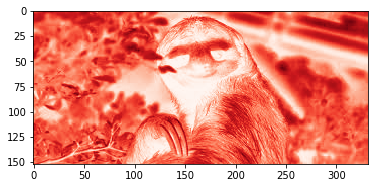

In [53]:
plt.imshow(img[:,:,1],cmap=plt.cm.Reds)

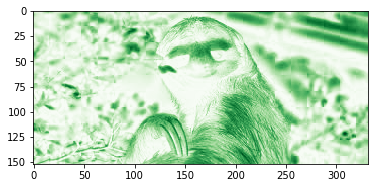

In [55]:
plt.imshow(img[:,:,2],cmap=plt.cm.Greens)

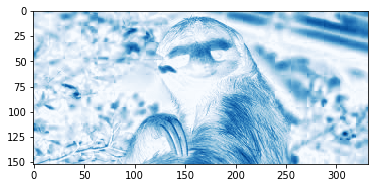

In [57]:
plt.imshow(img[:,:,2],cmap=plt.cm.Blues)

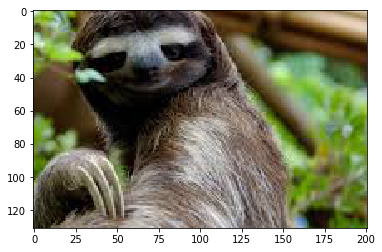

In [59]:
plt.imshow(img[19:150,99:300,:])

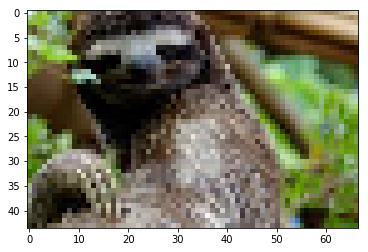

In [60]:
plt.imshow(img[19:150:3,99:300:3,:])

# I - Prétraitement et visualiation sur *digits*


Nous passons maintenant à un jeu de données classique en machine learning dans le cadre de la classification de chiffres manuscrits.

## Description du jeu de données:

On charge le jeu de données *digits* disponible dans le package scikit-learn (nom d'import sklearn). Ce jeu de données contient des images de chiffres numérisées. On va s'en servir au cours de cette séance pour étudier les principaux enjeux en classification (supervisée).  

In [119]:
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
target_and_data = list(zip(digits.target, digits.data))

**Questions**:

- Faites varier le choix de l'indice. Sans afficher la classe arrivez-vous à reconnaitre le chiffre représenté?
- Combien de fois le chiffre 1 apparait dans les données?

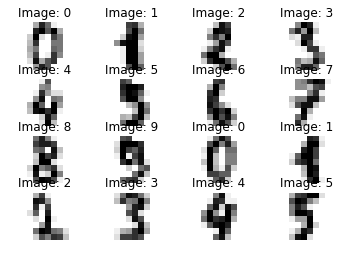

In [82]:
for index, (image, label) in enumerate(images_and_labels[:16]):
    plt.subplot(4, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Image: %i' % label)

In [86]:
sum(digits.target==1)

182

In [87]:
len(digits.images)

1797

## Visualisation des observations:

Les images scannées sont de taille  8 x 8 et comportent donc 64 pixels chacune. Elles sont stockées sous la forme de vecteurs lignes, qu'il faut remettre dans un ordre lisible pour les identifier. 

In [83]:
len(digits.images)

1797

In [94]:
digits.data.shape

(1797, 64)

In [95]:
images_vect=digits.data.reshape(1797,8,8)

In [96]:
images_vect.shape

(1797, 8, 8)


## Statistiques élementaires :
Pour mieux comprendre la base de données on va s'intéresser à quelques statistiques. 
On commence par calculer les moyennes et variances par classe pour chacun des chiffres. La moyenne par classe se visualise comme une image qui est une représentantion moyenne pour chaque chiffre de zéro à neuf. Idem pour la variance, ce qui permet alors de voir les parties avec les plus grandes variations entre les membres d'une même classe.

In [165]:
# Récupérer les modalités possible prises (Il y en a bien 10!) 
y = digits.target
x = digits.images
classes_list = np.unique(y).astype(int)
print(u'Liste des classes en présence: %s' % classes_list)
from collections import Counter
Counter(y)

Liste des classes en présence: [0 1 2 3 4 5 6 7 8 9]


Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

**Questions**:

- Calculer un représentant moyen du chiffre 0? Utiliser la fonction `np.mean`
- Avec une boucle `for` calculer et visualiser le représentant moyen pour chaque chiffre (on pourra utiliser `plt.subplots` pour afficher plusieurs panels)
- Calculer la variance du chiffre 0? Utiliser la fonction `np.var`
- Avec une boucle `for` calculer et visualiser la variance pour chaque chiffre

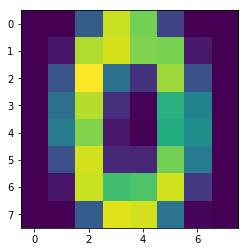

In [166]:
plt.imshow(x[y == 0, ...].mean(axis=0))

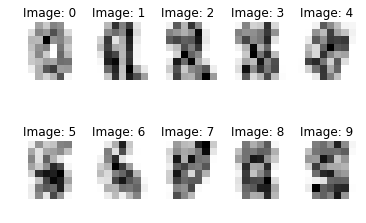

In [167]:
m = np.zeros((10,8,8))
v = np.zeros((10,8,8))

for i in range(10):
        m[i,:] = x[y == i, ...].mean(axis=0)
        v[i,:] = x[y == i, ...].var(axis=0)
        plt.subplot(2, 5, i + 1)
        plt.axis('off')
        plt.imshow(v[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Image: %i' % i)

# II - Mon premier classifieur


## Validation : découpage Apprentissage / Validation 

On procède de manière classique en réservant 80% des données pour la partie apprentissage, et 20% pour l'évaluation des classifieurs que l'on a construit sur la première partie.
En effet il n'est pas raisonnable de tester la performance sur 100% des données. Cela donnera lieu à du sur-apprentissage ("overfitting"). La généralisation des méthodes apprises serait alors très mauvaise.

In [164]:
from sklearn.model_selection import train_test_split

In [251]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Classification par plus proche centroide

**Questions**:

- Pour chaque chiffre calculer sur l'ensemble de train le chiffre moyen. On notera la variable contenant les moyennes `centroids_train`
- Pour chaque chiffre de l'ensemble de test, calculer le centroide le plus proche. Vous évaluerez si le chiffre ainsi obtenu correspond au vrai chiffre et en déduirez une estimation du taux de bonnes prédictions ("accuracy").

In [252]:
centroids_train = np.zeros((10,8,8))
for i in range(10):
        centroids_train[i, ...] = x_train[y_train == i, ...].mean(axis=0)

In [253]:
y_model = np.zeros(len(x_test))
for k in range(len(x_test)):
    y_model[k] = np.linalg.norm(centroids_train-x_test[k, ...],axis=(1,2)).argmin()

In [254]:
sum(y_test == y_model) / len(y_test)

0.91388888888888886

**Question**:
* Utiliser [sklearn.neighbors.NearestCentroid](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html) pour faire la même chose.

## Classification avec la méthode LDA

**Question**: 
* Utiliser la méthode [sklearn.discriminant_analysis.LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis) pour calculer les prédictions sur l'ensemble de test

## Mesure de performance

### Accuracy 

**Question**:
* Construire un classifieur "naif" qui prédirait chaque chiffre entre 0 et 9 avec probabilité 0.1 (on pourra utiliser la commande np.random.randint). Mesurer sa performance sur l'échantillon test.

### Précision et rappel

**Question**:
* Afficher la précision et le rappel pour tous les valeurs de chiffre de 0 à 9 en utilisant une boucle "for" pour le classifieur que l'on vient de considérer.

### Résumé de ces éléments avec scikit-learn

# III - Courbe d'apprentissage

Les courbes d'apprentissage permettent de quantifier le gain de performance obtenu en augmentant la taille des données. Cela permet de répondre à des questions comme:

* Ai-je assez de données?  
* Mon modèle est-il assez complexe pour mon problème?  

In [ ]:
N_range = np.linspace(15, X_train.shape[0], 20).astype(int)  

def plot_learning_curve(clf, clf_name):
    training_error = []
    test_error = []

    for N in N_range:
        XN = X_train[:N]
        yN = y_train[:N]
        clf.fit(XN, yN)        
        training_error.append(accuracy_score(clf.predict(XN), yN))
        test_error.append(accuracy_score(clf.predict(X_test), y_test))
    plt.figure()
    plt.plot(N_range, training_error, label='training')
    plt.plot(N_range, test_error, label='test')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(u'Courbe d\'apprentissage pour la méthode ' + clf_name)
    plt.xlabel('Nombre de points d\'entrainement')
    plt.ylabel('Pourcentage d\'erreurs')

Utiliser la fonction définie ci-dessus pour afficher la courbe d'apprentissage pour notre classifier LDA.

# IV - Comparaison de performances de classifieurs

In [ ]:
# Chargement d'une autre méthode de classification (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Liste des classifieurs évalués
classifiers = [('LDA', LinearDiscriminantAnalysis() ),
               ('KNN_k=1', KNeighborsClassifier(n_neighbors=1))]

## Calcul des métriques de performances

Pour chaque classifieur on évalue la performance par le score sur les données de test et le temps d'éxecution

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd        # charge un package pour le traitement des données
from timeit import timeit  # charge un package pour des mesures de temps


# Definition des métriques de performance
def perf_compute(clf, name, loops=10):
    """
    Calcule le temps d'apprentissage, de prediction, le score
    et la matrice de confusion d'un classifieur
    """
    # On initialise le conteneur
    perf = pd.Series(name=name)
    # On crée les callables qu'on passera à la fonction de profiling
    fit = lambda: clf.fit(X_train, y_train)
    score = lambda: clf.score(X_test, y_test)

    # On profile le temps des phases d'entrainement et de prédiction en ms
    perf['train_tps'] = timeit(fit, number=loops) / loops * 1000
    perf['test_tps'] = timeit(score, number=loops) / loops * 1000
    perf['total_tps'] = perf.train_tps + perf.test_tps
    # On calcule le score en pourcentage
    perf['score'] = score() * 100
    # On calcule la matrice de confusion
    perf['conf_mat'] = confusion_matrix(y_test, fit().predict(X_test))

    return perf

In [ ]:
# On lance le calcule de performance. On profile en bouclant 100 fois
perfs = pd.DataFrame([perf_compute(clf, name, loops=100) for name, clf in classifiers])
perfs = perfs.sort_values(by='score')

perfs['train_tps test_tps total_tps score'.split()].T

In [ ]:
# Barplot des performances
plt.style.use('ggplot')    # sortie graphique améliorées (tester sans!)

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
perfs['score'].plot(kind='barh',
                    title='Pourcentage d\'erreurs commises (en %)',
                    ax=axs[0])
perfs[['train_tps', 'test_tps', 'total_tps']].plot(kind='barh',
                                                   title='Temps (en ms)',
                                                   ax=axs[1])

In [ ]:
import seaborn as sns

def plot_conf_mat(perf, ax, title='Model'):
    """
    Affichage de la matrice de confusion
    """
    sns.heatmap(perf.conf_mat, ax=ax, square=True, annot=True)
    ax.set_title('{}: {}\nScore: {:.2f}'.format(title, perf.name, perf.score))
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

# Affichage du plus mauvais et du meilleur classifieur
# Les classifieurs sont classés par scores croissant
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
plot_conf_mat(perfs.iloc[0], ax=axs[0], title='Pire model')
plot_conf_mat(perfs.iloc[-1], ax=axs[1], title='Meilleur model')

# V - Validation croisée

Pour séparer le jeu de données en ensemble d'entraînement et de validation, nous avons utilisé la fonction: 
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,  random_state=42)
```
**Question**:
* Faire varier le random state et observer l'impact sur les performances du modèle LDA

Pour obtenir une estimation plus fiable des performances d'un modèle, on utilise la validation croisée ("cross-validation"). Cela consiste à utiliser plusieurs sous-ensembles d'entraînement et de validation. En fonction du type de données (séries temporelles, données i.i.d, données non équilibrées, ...), différentes stratégies pour définir ces sous-ensembles peuvent être utilisées. 

Pour notre exemple, nous allons utiliser des Stratified K-folds.

On peut alors calculer le score sur chacun des folds en utilisant 
[sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)

# VI- "Tuner" les hyperparamètres des estimateurs

Pour obtenir les hyperparamètres d'un estimateur, on peut exécuter:
`estimator.get_params()`

In [ ]:
KNeighborsClassifier().get_params()

La recherche des meilleurs hyperparamètres implique:
* le choix d'un estimateur  
* un espace des hyperparamètres  
* une méthode pour explorer cet espace
* un schéma de cross-validation  
* une mesure de performance  

**Questions**:
*  Quelle valeur de k dans le k-NN donne la meilleure performance? Faire varier k entre 1 et 10 et afficher un graphique de performance en fonction de k.  
On pourra utiliser [sklearn.grid_search.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) 